# AffectNet data perparation notebook

The data is structured as follows:
```text
AffectNet:
|---Manually_Annotated:
|---|---Manually_Annotated_Images
|---training.csv
|---validation.csv

We will convert it into an Images folder holding all the images and a labels.csv file.

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, os, shutil
import PIL.Image as Image
os.chdir('..')
from utility_scripts.adaface_utils.face_alignment.align import get_aligned_face

In [2]:
output_dir = os.path.join('data', 'datasets', 'emotion recognition', 'AffectNet')
os.path.exists(output_dir)

True

In [3]:
old_images_path = os.path.join(output_dir, 'Manually_Annotated', 'Manually_Annotated_Images')
os.path.exists(old_images_path)

True

In [4]:
new_images_path = os.path.join(output_dir, 'Images')
os.makedirs(new_images_path, exist_ok = True)

In [5]:
label_translation = {
    0 : 'neutral',
    1 : 'happy',
    2 : 'sad',
    3 : 'surprise',
    4 : 'fear',
    5 : 'disgust',
    6 : 'anger'
}

In [6]:
training_list = pd.read_csv(os.path.join(output_dir, 'training.csv'))
training_list['split'] = 'train'
validation_list = pd.read_csv(os.path.join(output_dir, 'validation.csv'))
validation_list['split'] = 'test'

combined_df = pd.concat([training_list, validation_list], ignore_index = True)

In [7]:
combined_df.head()

,subDirectory_filePath,face_x,face_y,face_width,face_height,facial_landmarks,expression,valence,arousal,split
0,689/737db2483489148d783ef278f43f486c0a97e140fc...,134.0,134.0,899,899,181.64;530.91;188.32;627.82;195.1;723.37;205.2...,1,0.785714,-0.055556,train
1,392/c4db2f9b7e4b422d14b6e038f0cdc3ecee239b5532...,20.0,20.0,137,137,28.82;77.52;29.12;93.25;31.04;108.51;33.03;123...,0,-0.017253,0.004313,train
2,468/21772b68dc8c2a11678c8739eca33adb6ccc658600...,11.0,11.0,176,176,30.52;87.33;32.55;106.43;36.94;125.81;43.06;14...,0,0.174603,0.007937,train
3,944/06e9ae8d3b240eb68fa60534783eacafce2def60a8...,40.0,40.0,269,269,44.43;158.17;47.08;189.2;50.54;221.88;58.3;253...,1,0.153401,0.038890,train
4,993/02e06ee5521958b4042dd73abb444220609d96f57b...,22.0,22.0,153,153,50.59;78.72;48.6;93.23;48.72;109.06;48.8;123.0...,8,0.783972,-0.551684,train


In [8]:
new_image_names = []
expressions = []
splits = []
counter = 0
for i in range(len(combined_df)):
    expression = combined_df['expression'][i]
    if expression > 6:
        continue
    
    file_path = combined_df['subDirectory_filePath'][i]
    face_x = combined_df['face_x'][i]
    face_y = combined_df['face_y'][i]
    face_width = combined_df['face_width'][i]
    face_height = combined_df['face_height'][i]
    landmarks = combined_df['facial_landmarks'][i]
    split = combined_df['split'][i]
    try:
        image = Image.open(os.path.join(old_images_path, file_path))
    except:
        continue
    
    x1 = face_x
    x2 = face_x + face_width
    y1 = face_y
    y2 = face_y + face_height
    
    new_image_name = f'{counter}.jpg'
    
    try:
        aligned_image = get_aligned_face(image_path = None, rgb_pil_image = image)
        aligned_image.save(
            os.path.join(new_images_path, new_image_name)
        )
    except:
        cropped_image = image.crop(box = [x1, y1, x2, y2]).resize(size = (112, 112))
        cropped_image.save(
            os.path.join(new_images_path, new_image_name)
        )
    
    new_image_names.append(new_image_name)
    expressions.append(expression)
    splits.append(split)

    counter+=1

Face detection Failed due to error.
list index out of range
Face detection Failed due to error.
list index out of range
Face detection Failed due to error.
list index out of range
Face detection Failed due to error.
list index out of range
Face detection Failed due to error.
list index out of range
Face detection Failed due to error.
list index out of range
Face detection Failed due to error.
list index out of range
Face detection Failed due to error.
list index out of range
Face detection Failed due to error.
list index out of range
Face detection Failed due to error.
list index out of range
Face detection Failed due to error.
list index out of range
Face detection Failed due to error.
list index out of range
Face detection Failed due to error.
list index out of range
Face detection Failed due to error.
list index out of range
Face detection Failed due to error.
list index out of range
Face detection Failed due to error.
list index out of range
Face detection Failed due to error.
list

In [9]:
labels_df = pd.DataFrame(
    data = {
        'filename' : new_image_names,
        'label' : expressions,
        'translated' : [label_translation[label] for label in expressions],
        'split' : splits 
    }
)

labels_df.to_csv(os.path.join(output_dir, 'labels.csv'), index = False)

## EDA

In [6]:
labels_df = pd.read_csv(os.path.join(output_dir, 'labels.csv'))

In [7]:
labels_df.head()

,filename,label,translated,split
0,0.jpg,1,happy,train
1,1.jpg,0,neutral,train
2,2.jpg,0,neutral,train
3,3.jpg,1,happy,train
4,4.jpg,6,anger,train


In [8]:
labels_df.tail()

,filename,label,translated,split
287396,287396.jpg,0,neutral,test
287397,287397.jpg,6,anger,test
287398,287398.jpg,6,anger,test
287399,287399.jpg,3,surprise,test
287400,287400.jpg,2,sad,test


In [11]:
classes, counts = np.unique(labels_df.label, return_counts = True)
sorted_idx = np.argsort(counts)
counts = counts[sorted_idx]
classes = classes[sorted_idx]

In [12]:
counts

array([  4303,   6878,  14590,  25382,  25959,  75374, 134915])

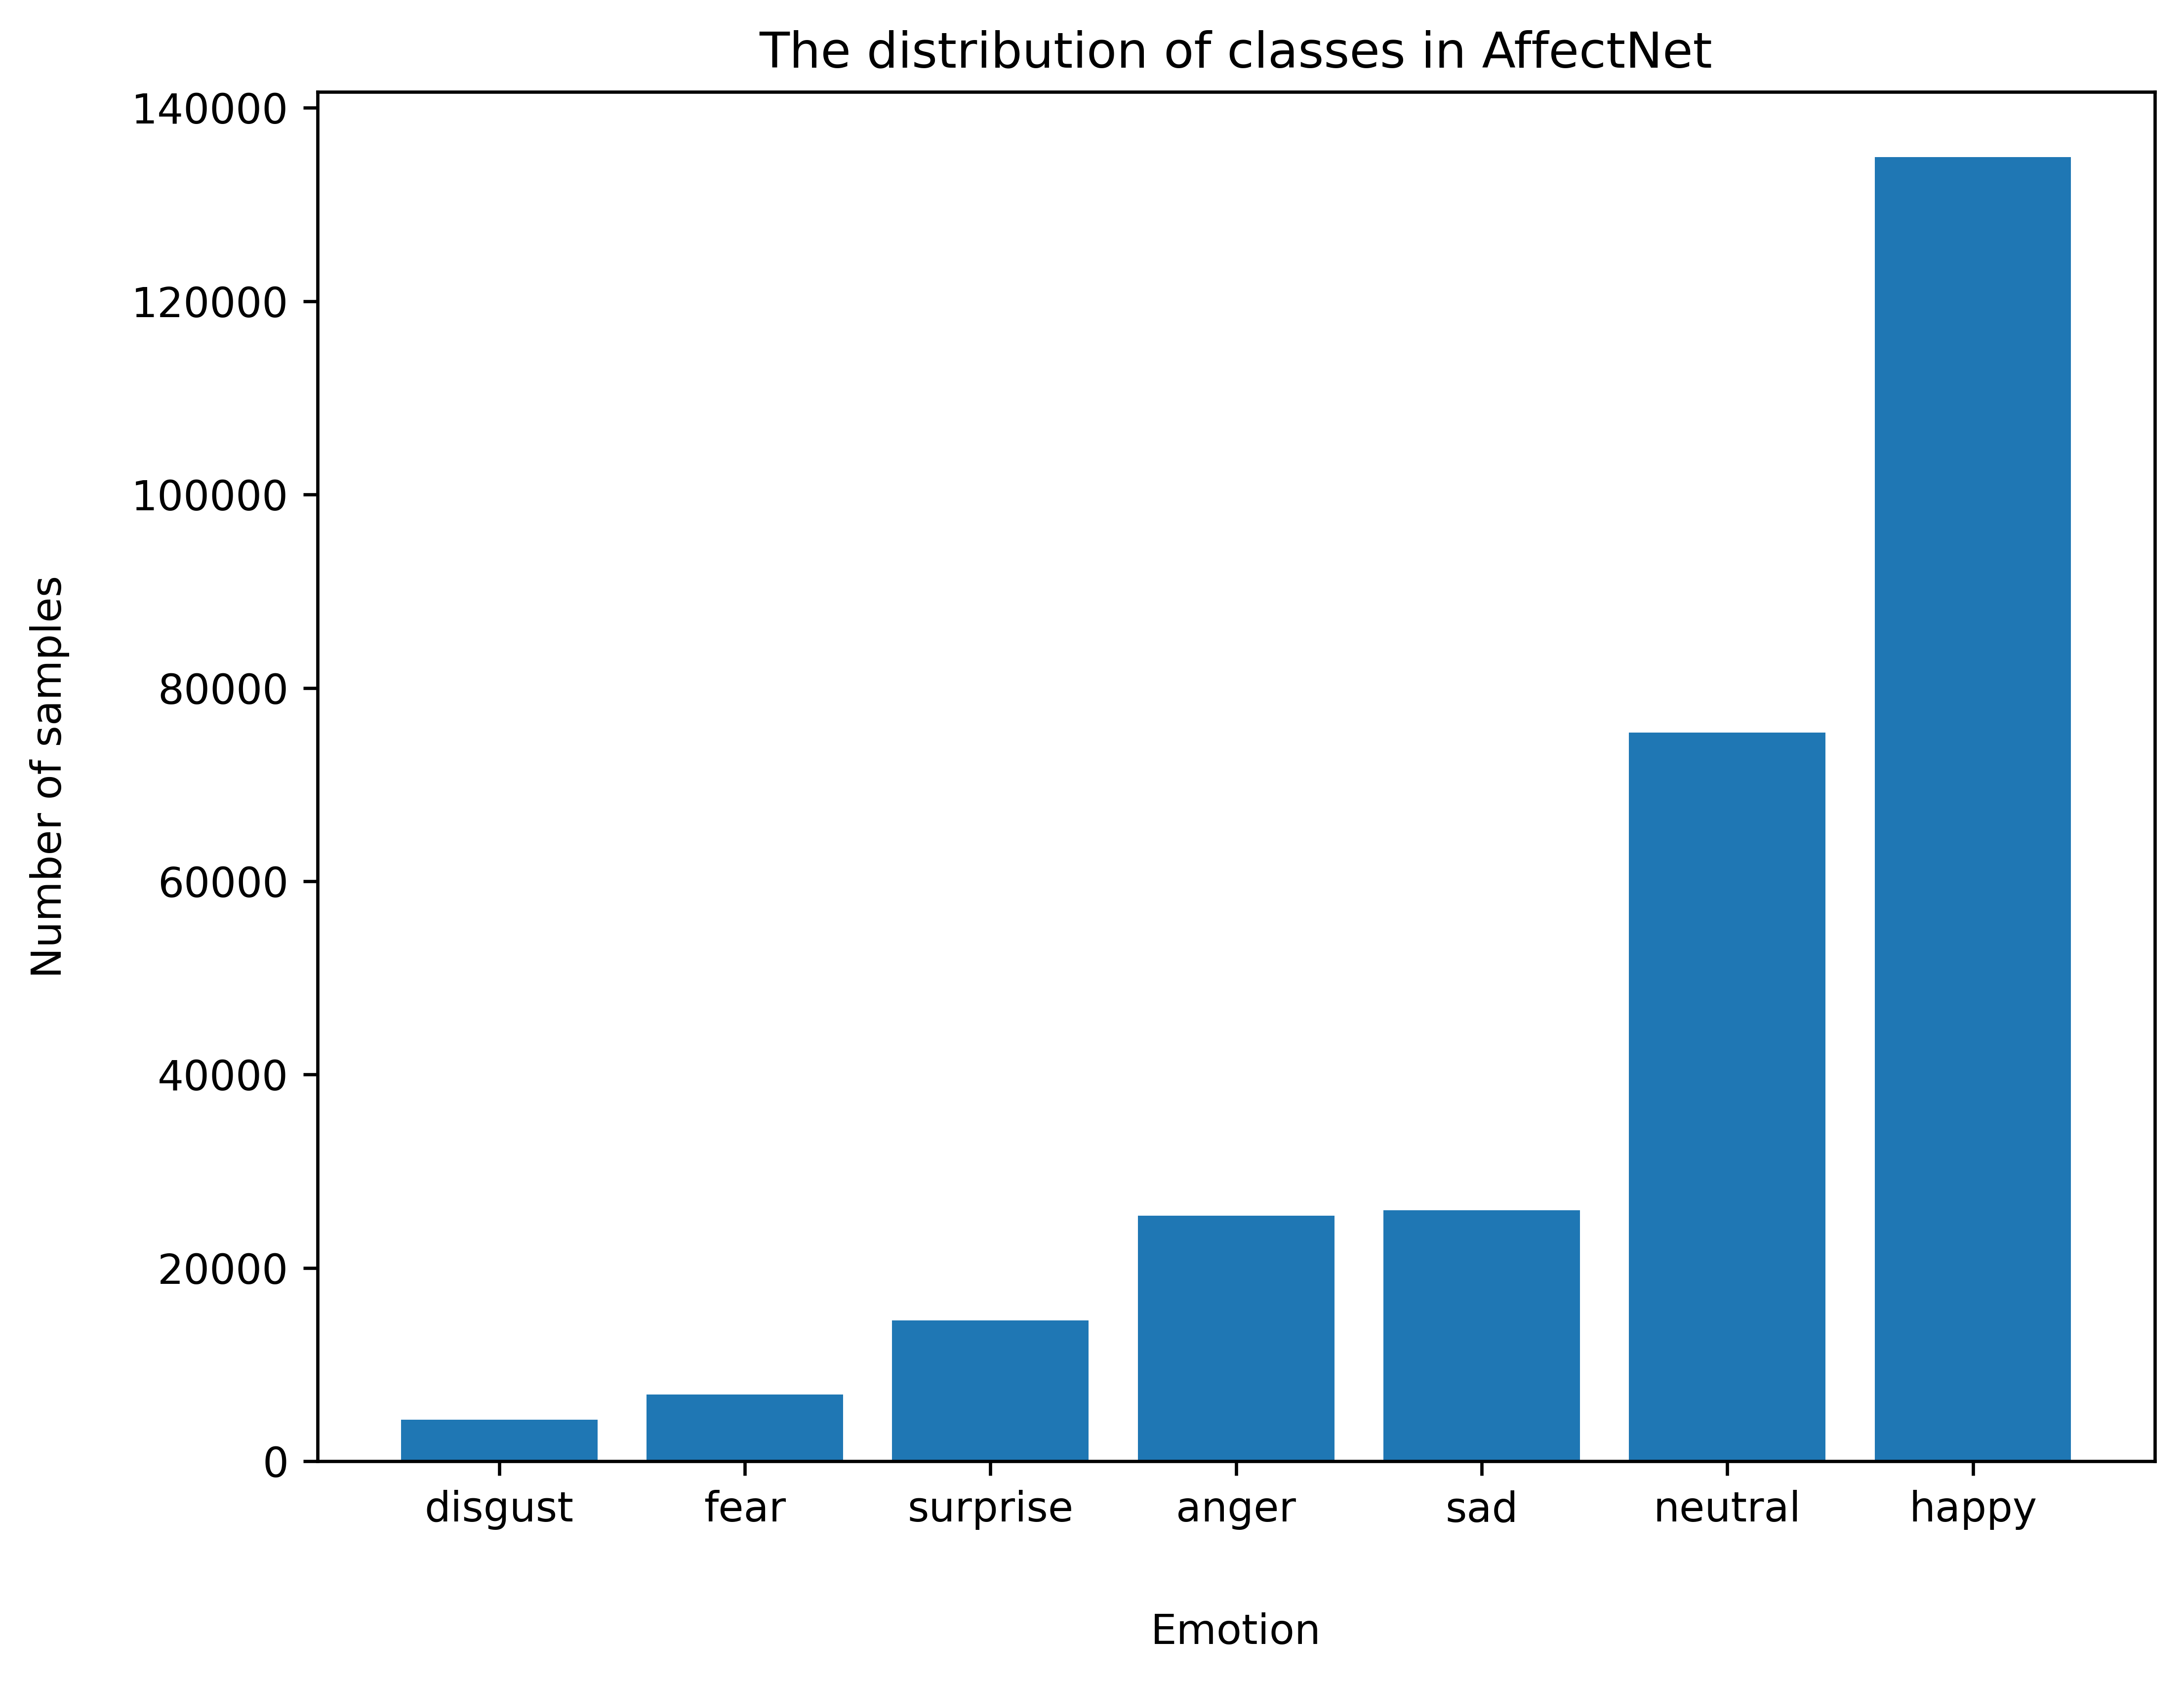

In [13]:
plt.figure(figsize = (8, 6), dpi = 600)
plt.title('The distribution of classes in AffectNet')
plt.bar([label_translation[cls] for cls in classes], counts)
plt.xlabel('Emotion', labelpad = 20)
plt.ylabel('Number of samples', labelpad = 15)
plt.savefig(
    os.path.join('data', 'figures', 'Emotion Recognition', 'AffectNet', 'The distribution of classes in AffectNet')
)
plt.show()


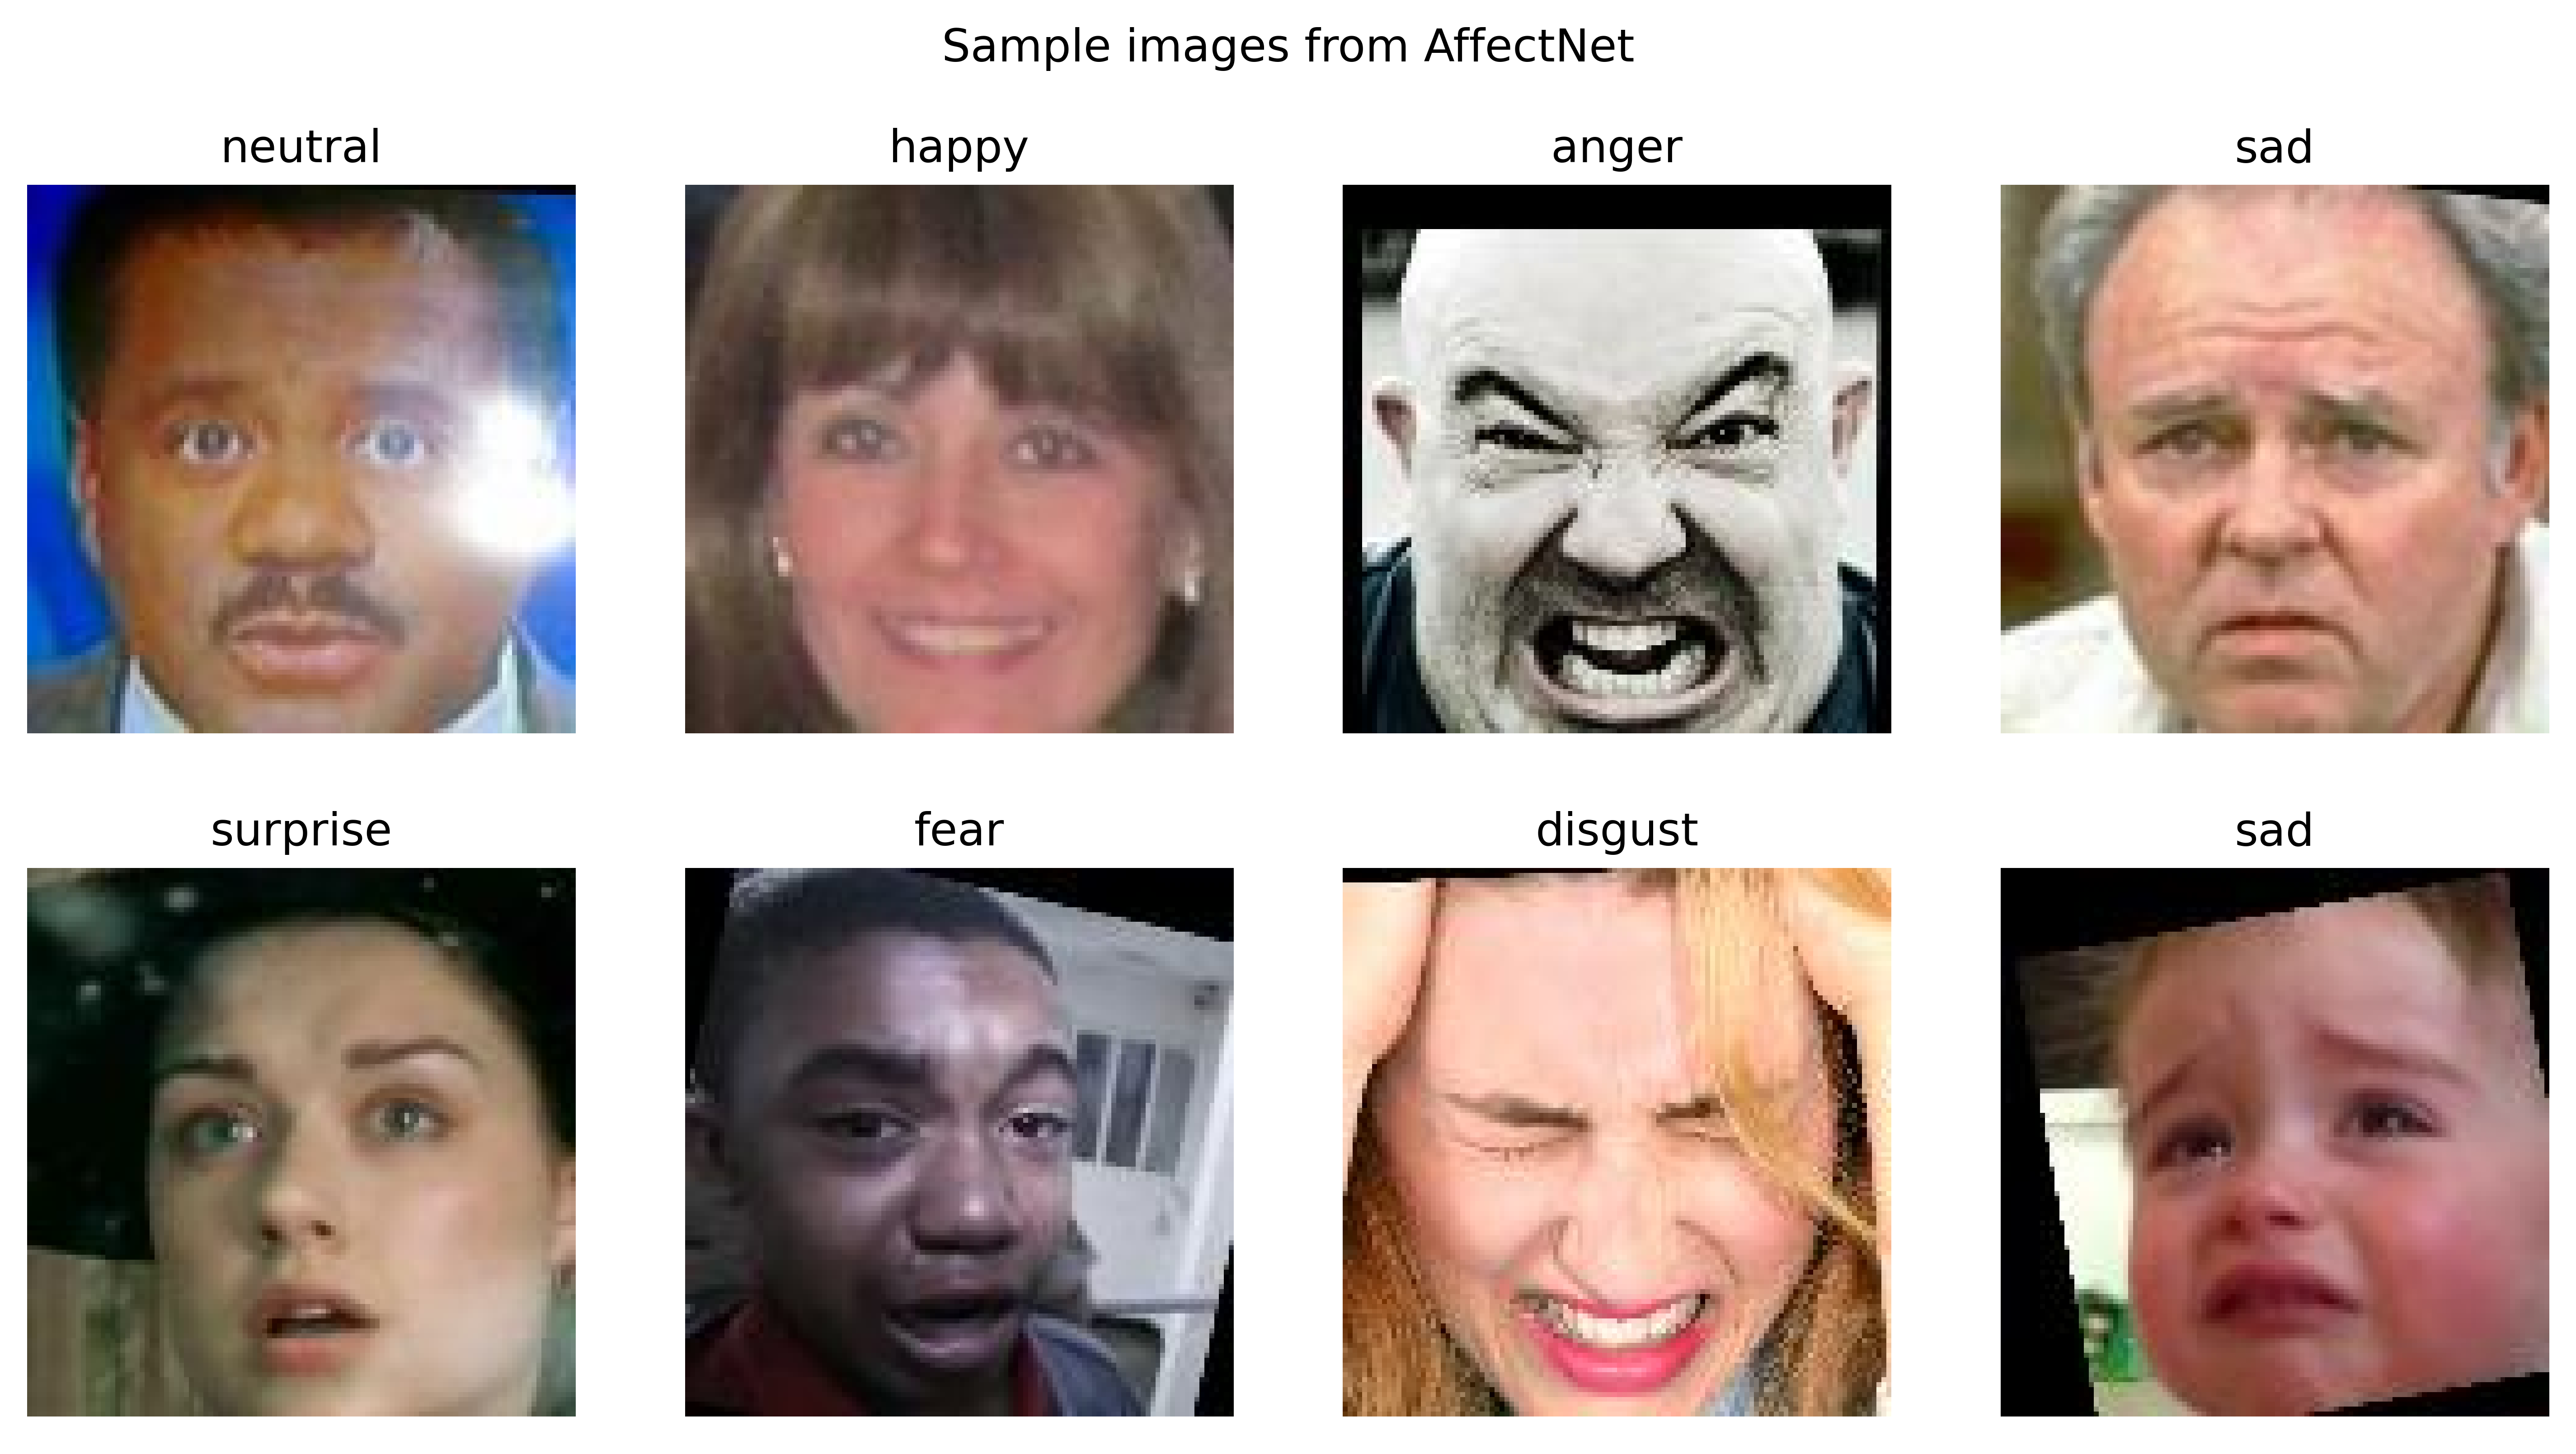

In [15]:
plt.figure(figsize = (12, 6), dpi = 600)
plt.title('Sample images from AffectNet', pad = 30)
plt.axis('off')
chosen_emotions = []
for i in range(8):
    idx = np.random.randint(low = 0, high = len(labels_df))
    label_translated = labels_df['translated'][idx]

    while label_translated in chosen_emotions:
       idx = np.random.randint(low = 0, high = len(labels_df))
       label_translated = labels_df['translated'][idx]

       if len(chosen_emotions) >= 7:
           break
    chosen_emotions.append(label_translated)
     
    image_name = labels_df['filename'][idx]
    image = plt.imread(os.path.join(output_dir, 'Images', image_name))

    plt.subplot(2, 4, i+1)
    plt.imshow(image)
    plt.title(label_translated)
    plt.axis('off')
plt.savefig(
    os.path.join('data', 'figures', 'Emotion Recognition', 'AffectNet', 'Sample images from AffectNet')
)
plt.show()